<a href="https://colab.research.google.com/github/MayumyCH/Graficos_Cheat_Sheets/blob/main/Graficos_Cheat_Sheets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRÁFICOS CHEAT SHEETS
_“Un gráfico dice un poco más que mil palabras”_


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline

## CASO DE ESTUDIO

Se tiene una data proporcionada por Kaggle el cual corresponde a ventas de videojuegos y los scores obtenidos; Todos estos registros pertenecen al género de Acción.

## Comprensión del Negocio

**Ventas de videojuegos de Vgchartz y calificaciones correspondientes de Metacritic**

Motivado por el web scraping de [Gregory Smith](https://www.kaggle.com/gregorut/datasets) de VGChartz [‎‎Video Games Sales](https://www.kaggle.com/gregorut/videogamesales).
Este conjunto de datos simplemente amplía el número de variables con otro web scraping de [‎‎Metacritic](https://www.metacritic.com/browse/games/release-date/available).‎‎

Desafortunadamente, faltan observaciones, ya que Metacritic solo cubre un subconjunto de las plataformas. Además, un juego puede no tener todas las observaciones de las variables adicionales que se analizan a continuación. 

## Extracción y comprensión de los datos

In [112]:
# CARGA DE DATA
# ----------------

# dataGames = pd.read_csv('./dataGames.csv')
url = 'https://raw.githubusercontent.com/MayumyCH/Graficos_Cheat_Sheets/main/dataset/dataGames.csv'
dataGames = pd.read_csv(url)
dataGames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,GPlatforms,Has_Score
0,Assassin's Creed III,PS3,2012.0,Action,Ubisoft,2.64,2.52,0.16,1.12,6.45,85.0,41.0,6.9,1307.0,Ubisoft,M,Playstation,True
1,Assassin's Creed II,PS3,2009.0,Action,Ubisoft,2.54,1.93,0.21,0.86,5.55,91.0,70.0,8.6,1202.0,Ubisoft Montreal,M,Playstation,True
2,Assassin's Creed III,X360,2012.0,Action,Ubisoft,3.13,1.69,0.03,0.44,5.29,84.0,61.0,6.7,1196.0,Ubisoft,M,Xbox,True
3,Assassin's Creed II,X360,2009.0,Action,Ubisoft,3.11,1.55,0.08,0.51,5.26,90.0,82.0,8.8,1305.0,Ubisoft Montreal,M,Xbox,True
4,Resident Evil 5,PS3,2009.0,Action,Capcom,1.96,1.41,1.08,0.64,5.09,84.0,76.0,7.5,667.0,Capcom,M,Playstation,True


In [113]:
dataGames.shape
# Features || variables

(1098, 18)

In [114]:
print(f'Nuestro dataset tiene {dataGames.shape[0]} registros, y {dataGames.shape[1]} features')

Nuestro dataset tiene 1098 registros, y 18 features


In [115]:
# Información de la data

dataGames.info()
# 7 Features de tipo object (Name, Platform, Genre, Publisher, User_Score, Developer, Rating)
# 9 Features numericos
# 1 Feature booleano

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1098 non-null   object 
 1   Platform         1098 non-null   object 
 2   Year_of_Release  1093 non-null   float64
 3   Genre            1098 non-null   object 
 4   Publisher        1098 non-null   object 
 5   NA_Sales         1098 non-null   float64
 6   EU_Sales         1098 non-null   float64
 7   JP_Sales         1098 non-null   float64
 8   Other_Sales      1098 non-null   float64
 9   Global_Sales     1098 non-null   float64
 10  Critic_Score     580 non-null    float64
 11  Critic_Count     580 non-null    float64
 12  User_Score       670 non-null    object 
 13  User_Count       556 non-null    float64
 14  Developer        677 non-null    object 
 15  Rating           665 non-null    object 
 16  GPlatforms       1098 non-null   object 
 17  Has_Score     

In [116]:
# Cantidad de nulos por variable
dataGames.isna().sum().sort_values(ascending=False)

User_Count         542
Critic_Score       518
Critic_Count       518
Rating             433
User_Score         428
Developer          421
Year_of_Release      5
Name                 0
GPlatforms           0
Global_Sales         0
Platform             0
Other_Sales          0
JP_Sales             0
EU_Sales             0
NA_Sales             0
Publisher            0
Genre                0
Has_Score            0
dtype: int64

In [117]:
dataGames.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,1093.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,580.000000,580.000000,556.000000
mean,2009.119854,0.214818,0.124627,0.044235,0.042095,0.426239,67.112069,26.768966,143.250000
std,5.262983,0.378064,0.263711,0.130317,0.091224,0.717071,12.786659,19.434449,375.399228
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,23.000000,4.000000,4.000000
25%,2006.000000,0.000000,0.000000,0.000000,0.000000,0.060000,59.000000,11.000000,11.000000
50%,2010.000000,0.090000,0.020000,0.000000,0.010000,0.170000,67.500000,22.000000,25.000000
75%,2013.000000,0.240000,0.127500,0.030000,0.040000,0.450000,77.000000,38.000000,82.000000
max,2017.000000,3.130000,2.520000,2.790000,1.120000,6.450000,96.000000,91.000000,4378.000000


In [118]:
# INTERPRETACIÓN
# El 50% de las ventas totales en el mundo estan en el rango de 60 mil y 450 mil de dolares

# El 25% del total de registros de videojuegos tienen mas de 38 criticos

### Analisis Univariante

#### Variables Categoricas

**Platform**

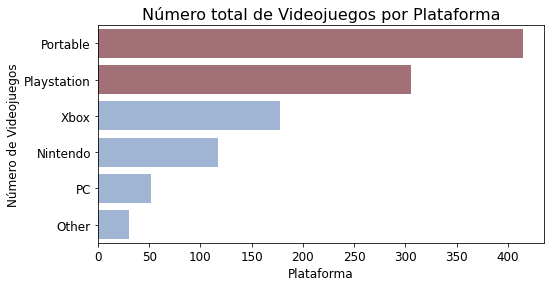

In [119]:
# GRAFICO DE BARRAS
# ---------------------------

# Tamaño
plt.figure(figsize=(8, 4)) # (Ancho ,Alto)

# Color
arrayColor=['#95434E' if (x > 200) else '#7FA0D2' for x in dataGames['GPlatforms'].value_counts() ]

# ---- MATPLOLIB
# x = df['GPlatforms'].value_counts().index # Etiquetas
# y = df['GPlatforms'].value_counts().values # Valores

# x = dataGames.groupby('GPlatforms')['GPlatforms'].count().sort_values(ascending=False).index # Etiquetas
# y = dataGames.groupby('GPlatforms')['GPlatforms'].count().sort_values(ascending=False).values # Valores

# plt.barh(x,y, color='#8EB897')

# ---- SEABORN 
sns.countplot(y=dataGames['GPlatforms'].dropna(),order = dataGames['GPlatforms'].value_counts().index,palette=arrayColor,alpha = 0.8)

# Ejes y titulo
plt.title('Número total de Videojuegos por Plataforma',fontdict={'fontsize':16})
plt.xlabel('Plataforma',fontdict={'fontsize':12})
plt.ylabel('Número de Videojuegos',fontsize='large')
# plt.grid(True,alpha = 0.2)

plt.tick_params(axis='both',labelsize=12)

# plt.savefig('test.png', dpi=100) # dpi <> resolución por pulgada

In [120]:
dataGames['GPlatforms'].value_counts()

Portable       415
Playstation    306
Xbox           178
Nintendo       117
PC              52
Other           30
Name: GPlatforms, dtype: int64

In [121]:
dataGames['GPlatforms'].value_counts()/len(dataGames['GPlatforms'])

Portable       0.377960
Playstation    0.278689
Xbox           0.162113
Nintendo       0.106557
PC             0.047359
Other          0.027322
Name: GPlatforms, dtype: float64

**Publisher**

In [122]:
# Crear un funcion
def gDonut(column, colors):
    values = column.value_counts().values
    labels = column.value_counts().index

    # Grafico pie
    plt.pie(values,labels=labels, 
            colors=colors, 
            pctdistance=0.85, # Distancia de la grafica a la etiqueta
            # wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' },
            # autopct="%1.1f%%"
            )

    # Agregar circulo blanco       
    centerCircle = plt.Circle((0,0), 0.70, color="white")
    fig = plt.gcf() # Obteniendo la figura actual; sino existe la creo
    fig.gca().add_artist(centerCircle) # fig.gca() <> Instancia el axes

In [123]:
# COLORES

# from palettable.colorbrewer.qualitative import Pastel1_7
# https://jiffyclub.github.io/palettable/colorbrewer/qualitative/

# from palettable.lightbartlein.diverging import RedYellowBlue_7
# http://jiffyclub.github.io/palettable/lightbartlein/diverging/

# arrColors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897','#D98768', '#A09F8C']
# sns.color_palette("Set2")
# RedYellowBlue_7.hex_colors
# Pastel1_7.hex_colors

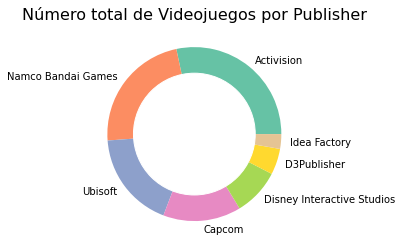

In [124]:
gDonut(dataGames["Publisher"],sns.color_palette("Set2"));
plt.title("Número total de Videojuegos por Publisher",fontdict={'fontsize':16});

In [125]:
# Interpretacion
# Activision estudio de videojuegos estadounidense
# Bandai Namco Entertainment estudio de videojuegos japonesa
# ubisoft Namco Entertainment estudio de videojuegos francesa
# capcom Namco Entertainment estudio de videojuegos japonesa
# disney estudio de videojuegos estadounidense

# JAPON <> 37.4
# EEUU <> 37.4

In [126]:
dataGames.Publisher.value_counts()

Activision                    311
Namco Bandai Games            251
Ubisoft                       198
Capcom                        159
Disney Interactive Studios     96
D3Publisher                    53
Idea Factory                   30
Name: Publisher, dtype: int64

In [127]:
dataGames.Publisher.value_counts()/len(dataGames.Publisher)

Activision                    0.283242
Namco Bandai Games            0.228597
Ubisoft                       0.180328
Capcom                        0.144809
Disney Interactive Studios    0.087432
D3Publisher                   0.048270
Idea Factory                  0.027322
Name: Publisher, dtype: float64

**Developer**

In [128]:
len(dataGames['Developer'].value_counts())
# 162 diferentes developer (Responsables del Juego)

162

In [129]:
arrColor=['#95434E' if (x > 20) else '#7FA0D2' for x in dataGames['Developer'].value_counts() ] #highlight bars

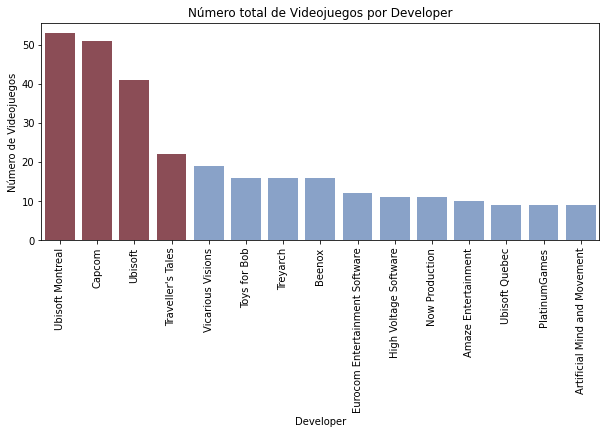

In [130]:
plt.figure(figsize=(10, 4));
sns.countplot(x=dataGames.Developer.dropna(), order = dataGames.Developer.value_counts().iloc[:15].index, palette=arrColor[:15]);
plt.xticks(rotation=90);
plt.title("Número total de Videojuegos por Developer");
plt.xlabel('Developer');
plt.ylabel('Número de Videojuegos');

In [131]:
# Vemos una distribucion exponencial lo que nos daria entender que a poco developer (estudios / productores) les va bien
# En la industria de los videojuegos

**Name**

In [132]:
len(dataGames['Name'].value_counts())

605

In [133]:
# SI NO TIENES LA LIBRERIA wordcloud TIENES QUE INSTALARLA !!
# pip install wordcloud

In [134]:
# NUBE DE PALABRAS
from wordcloud import WordCloud, STOPWORDS

In [135]:
def show_wordcloud(dataWords):
  # Veamos los nombres de nuestros juegos
  comment_words = '' 
  stopwords = set(STOPWORDS)

  # Haciendo cada celda de la columna Name una lista, sin comillas y
  # agregandola a una variable con todas las palabras

  # strip() <> Quitar espacio al inicio y al final
  # split() <> Divida la cadena en una lista

  for word in dataWords:
      word = str(word)
      msg = word.replace('"', ' ').strip().split()
      comment_words += " ".join(msg)+" "

  # Instanciando el wordCloud
  wordcloud = WordCloud(width = 500, height = 500, 
                  background_color ='white', 
                  stopwords = stopwords, 
                  min_font_size = 10).generate(comment_words)


  # WORDCLOUD DE TODOS LOS MENSAJES EN GENERAL                 
  plt.figure(figsize = (6, 10), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0.5) # Ajustar los parametros a la subtrama
  plt.show()

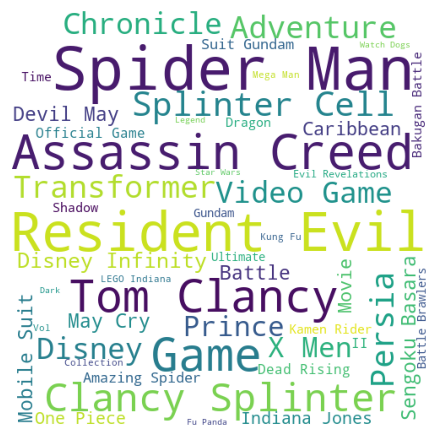

In [136]:
# Names de los juegos
dataWords = dataGames.Name
show_wordcloud(dataWords)

#### Variables Numericas

**Year_of_Release**

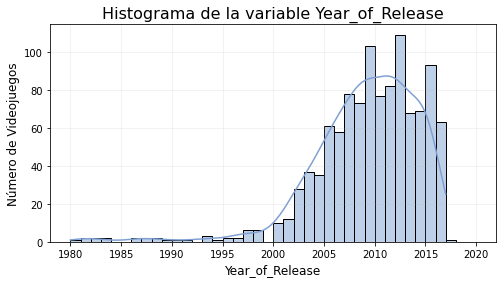

In [137]:
plt.figure(figsize=(8, 4));
sns.histplot(dataGames['Year_of_Release'].dropna(), kde=True, bins=range(1980, 2021), color="#7FA0D2");

# kde=True <> Agrega la curva KDE
plt.title('Histograma de la variable Year_of_Release',fontdict={'fontsize':16});
plt.xlabel('Year_of_Release',fontdict={'fontsize':12});
plt.ylabel('Número de Videojuegos',fontdict={'fontsize':12});
plt.grid(True,alpha = 0.2)

**Global_Sales** ( VARIABLE TARGET )

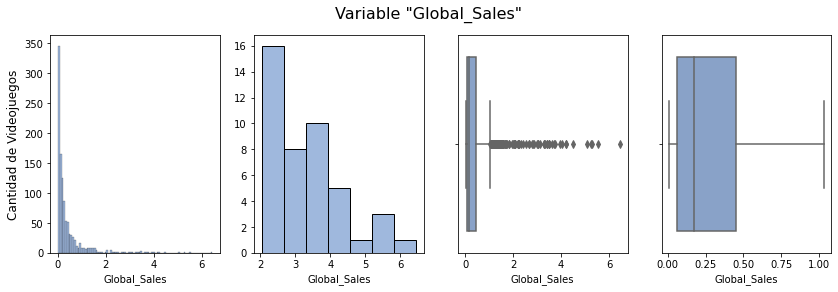

In [138]:
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(14, 4));

colors = "#7FA0D2";
tamAxis=12

sns.histplot(dataGames.Global_Sales.dropna(), kde=False, ax=axs[0],color=colors);
second_plt = sns.histplot(dataGames.Global_Sales.dropna()[dataGames.Global_Sales > 2], kde=False, ax=axs[1],color=colors);
sns.boxplot(x=dataGames.Global_Sales, ax=axs[2],color=colors);
sns.boxplot(x=dataGames.Global_Sales, ax=axs[3], showfliers=False,color=colors);
# showfliers=False <> No mostrar los valores atipicos

Global_Salesfig.suptitle('Variable "Global_Sales"',fontsize=16);

axs[0].set_ylabel('Cantidad de Videojuegos', fontsize=tamAxis);
axs[1].set_ylabel('');

# second_plt.set_yscale('log')

**Criticos (Score || count)**

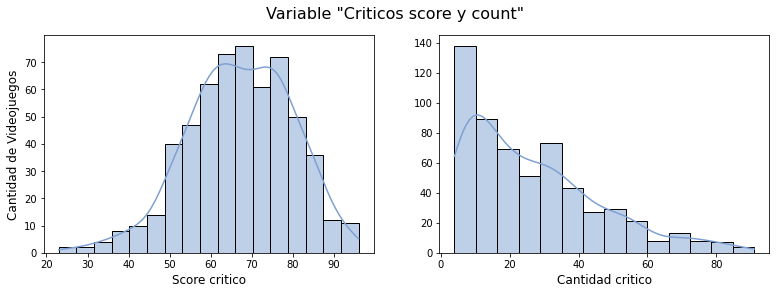

In [139]:
Critic_fig, axs = plt.subplots(ncols = 2, figsize=(13, 4))
colors = "#7FA0D2";
tamAxis=12
sns.histplot(dataGames.Critic_Score.dropna(),ax=axs[0], color=colors,kde=True);
sns.histplot(dataGames.Critic_Count.dropna(),ax=axs[1], color=colors,kde=True);

Critic_fig.suptitle('Variable "Criticos score y count"',fontsize=16)
axs[0].set_xlabel('Score critico', fontsize=tamAxis);
axs[0].set_ylabel('Cantidad de Videojuegos', fontsize=tamAxis);
axs[1].set_xlabel('Cantidad critico', fontsize=tamAxis);
axs[1].set_ylabel('');

### Analisis Bivariante

In [140]:
# plt.figure(figsize=(14, 14))
# sns.pairplot(dataGames, diag_kind='kde');

**Publisher vs Global_Sales**

In [141]:
dataGames.groupby('Publisher').sum()['Global_Sales']

Publisher
Activision                    140.41
Capcom                         85.06
D3Publisher                     9.78
Disney Interactive Studios     50.87
Idea Factory                    0.67
Namco Bandai Games             37.47
Ubisoft                       143.75
Name: Global_Sales, dtype: float64

In [142]:
dataGames.groupby('Publisher').sum()['Global_Sales'].sort_values(ascending=False)

Publisher
Ubisoft                       143.75
Activision                    140.41
Capcom                         85.06
Disney Interactive Studios     50.87
Namco Bandai Games             37.47
D3Publisher                     9.78
Idea Factory                    0.67
Name: Global_Sales, dtype: float64

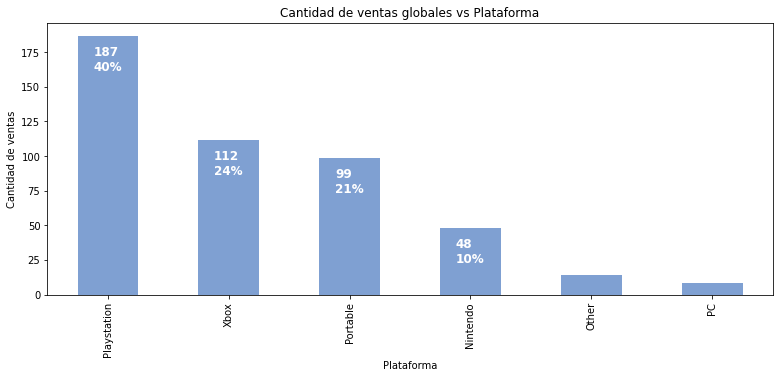

In [143]:
colors = "#7FA0D2";
ax = dataGames.groupby('GPlatforms').sum()['Global_Sales'].sort_values(
    ascending=False).head(7).plot(kind='bar', figsize=(13, 5), color=colors);

for p in ax.patches:
    ax.annotate(str( round( p.get_height() ) ) + "\n" + str(round( 100.0* p.get_height() /dataGames['Global_Sales'].sum()) )+ "%", 
                (p.get_x() + 0.13, p.get_height()-25),
                color='white', fontsize=12, fontweight='bold')
    
plt.title("Cantidad de ventas globales vs Plataforma")
plt.xlabel('Plataforma')
plt.ylabel('Cantidad de ventas');

In [144]:
dataGames.groupby('GPlatforms').sum()['Global_Sales'].sort_values(
    ascending=False)

GPlatforms
Playstation    186.96
Xbox           111.54
Portable        98.82
Nintendo        48.41
Other           14.20
PC               8.08
Name: Global_Sales, dtype: float64

In [145]:
dataGames.groupby('GPlatforms').sum()['Global_Sales'].sort_values(
    ascending=False).head(7)

GPlatforms
Playstation    186.96
Xbox           111.54
Portable        98.82
Nintendo        48.41
Other           14.20
PC               8.08
Name: Global_Sales, dtype: float64

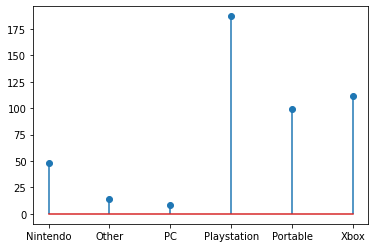

In [146]:
# GRAFICO DE LINES VERTICALES
y = dataGames.groupby('GPlatforms').sum()['Global_Sales'].values
x = dataGames.groupby('GPlatforms').sum()['Global_Sales'].index
plt.stem(x, y, use_line_collection=True)
plt.show()

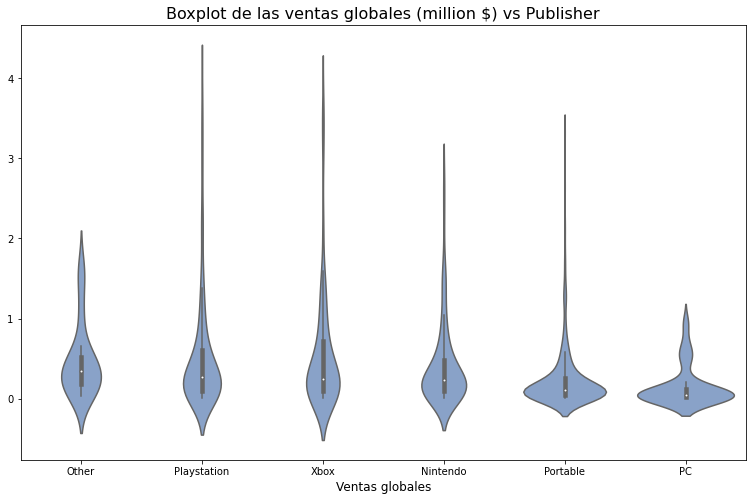

In [147]:
plt.figure(figsize=(13, 8))
colors = "#7FA0D2";
tamAxis=10

dataGrafico = dataGames[dataGames['Global_Sales']< 4]
orderGrafico = dataGrafico.groupby(by=["GPlatforms"])["Global_Sales"].median().sort_values(ascending=False).index
sns.violinplot(x='GPlatforms', y='Global_Sales',
            data = dataGrafico, 
            color=colors,order=orderGrafico)
plt.title('Boxplot de las ventas globales (million $) vs Publisher',fontdict={'fontsize':16})
plt.xlabel('Ventas globales',fontdict={'fontsize':12})
plt.ylabel('')
plt.show()

C:\Users\Mayu\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Mayu\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

41.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Mayu\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



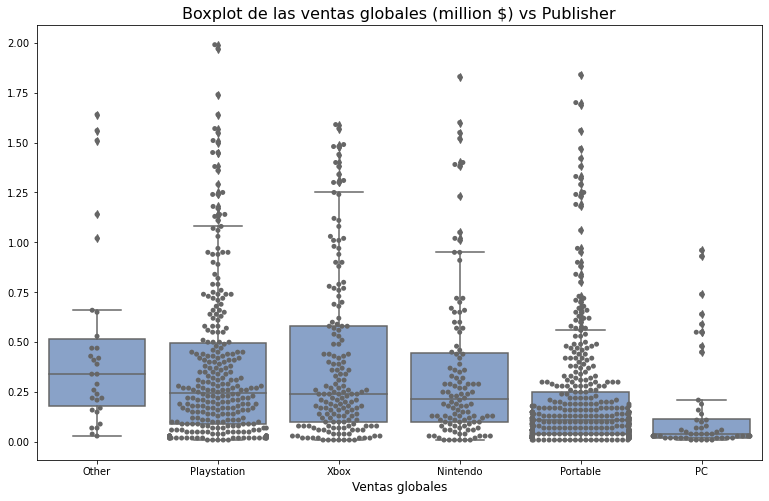

In [148]:
plt.figure(figsize=(13, 8))
colors = "#7FA0D2";
tamAxis=10

dataGrafico = dataGames[dataGames['Global_Sales']< 2]
orderGrafico = dataGrafico.groupby(by=["GPlatforms"])["Global_Sales"].median().sort_values(ascending=False).index
sns.boxplot(x='GPlatforms', y='Global_Sales',
            data = dataGrafico, 
            color=colors,order=orderGrafico)
sns.swarmplot(x='GPlatforms', y='Global_Sales',
             color='#666666',
            data = dataGrafico,order=orderGrafico)
plt.title('Boxplot de las ventas globales (million $) vs Publisher',fontdict={'fontsize':16})
plt.xlabel('Ventas globales',fontdict={'fontsize':12})
plt.ylabel('')
plt.show()

**Publisher vs Global_Sales**

In [149]:
# dataGames.query('Global_Sales < 4')
# dataGames[dataGames['Global_Sales']< 4]

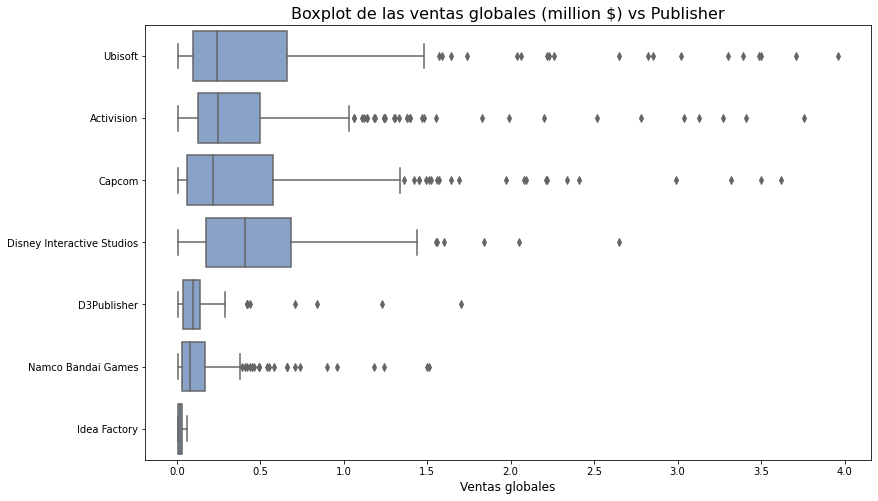

In [150]:
plt.figure(figsize=(13, 8))
colors = "#7FA0D2";
tamAxis=10

sns.boxplot(y='Publisher', x='Global_Sales',
            data = dataGames[dataGames['Global_Sales']< 4], 
            orient='h',color=colors)
plt.title('Boxplot de las ventas globales (million $) vs Publisher',fontdict={'fontsize':16})
plt.xlabel('Ventas globales',fontdict={'fontsize':12})
plt.ylabel('')
plt.show()

In [151]:
dataGames['GPlatforms'].value_counts()

Portable       415
Playstation    306
Xbox           178
Nintendo       117
PC              52
Other           30
Name: GPlatforms, dtype: int64

In [152]:
# colormap= 'Greens'
# colormap= 'Blues'
arrColors = ['#bbcad5', '#7FA0D2', '#607888']

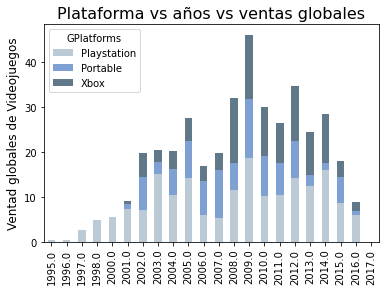

In [153]:
dataGames3P = dataGames[(dataGames['GPlatforms'] == 'Playstation') | (dataGames['GPlatforms'] == 'Portable') | (dataGames['GPlatforms'] == 'Xbox')]

yearlySales = dataGames3P.groupby(['Year_of_Release','GPlatforms']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, color= arrColors)

plt.title('Plataforma vs años vs ventas globales',fontdict={'fontsize':16})
plt.xlabel('')
plt.ylabel('Ventad globales de Videojuegos',fontsize='large');


plt.savefig('test.png', dpi=200) # dpi <> resolución por pulgada

**Platform vs Year_of_Release**

<AxesSubplot:xlabel='Year_of_Release'>

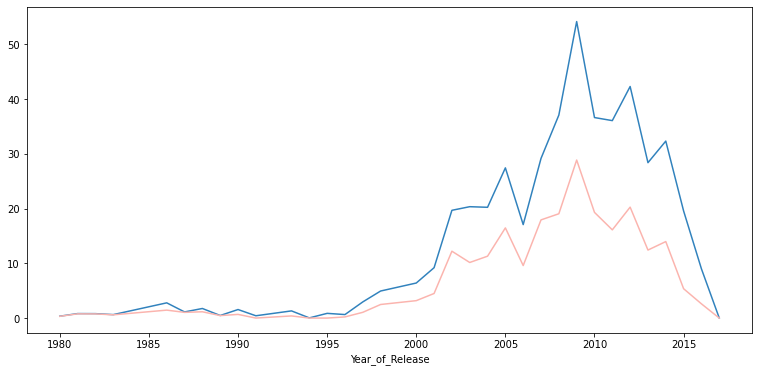

In [154]:
globalSalesyear = dataGames.groupby('Year_of_Release').Global_Sales.sum()
naSalesyear = dataGames.groupby('Year_of_Release').NA_Sales.sum()

# https://matplotlib.org/stable/tutorials/colors/colormaps.html
globalSalesyear.plot(kind='line', stacked=True, colormap= 'tab20c', figsize=(13, 6) )
naSalesyear.plot(kind='line', stacked=True, colormap= 'Pastel1', figsize=(13, 6) )

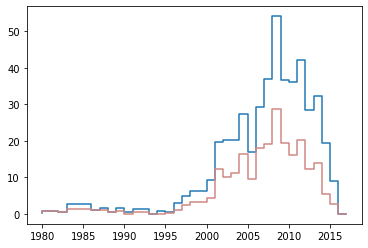

In [155]:
# GRAFICO DE ESCALERA ( STEP )
# Muestra las variaciones de forma continua en forma de escaleras
y = dataGames.groupby('Year_of_Release').Global_Sales.sum().values
x = dataGames.groupby('Year_of_Release').Global_Sales.sum().index
plt.step(x, y) 
y = dataGames.groupby('Year_of_Release').NA_Sales.sum().values
x = dataGames.groupby('Year_of_Release').NA_Sales.sum().index
plt.step(x, y,color='#d18683') 
plt.show()

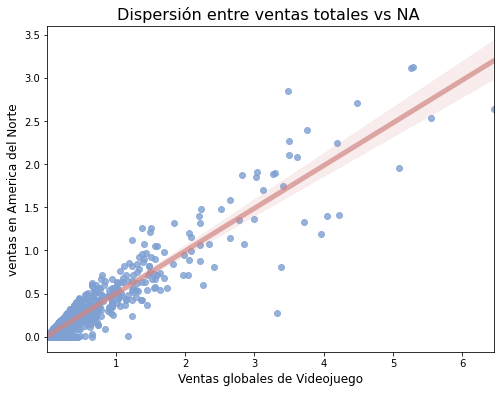

In [156]:
# Gráfico de dispersión
# Representar la relación entre dos variables.

plt.figure(figsize=(8, 6))
colors = "#7FA0D2";
tamAxis=10

# Matplotlib
# plt.plot( 'Global_Sales', 'NA_Sales', data=dataGames, linestyle='none', marker='o')

# Seaborn
# 
sns.regplot(x=dataGames["Global_Sales"], y=dataGames["NA_Sales"], line_kws={"color":"#d18683","alpha":0.7,"lw":5},fit_reg=True, color=colors)

plt.title('Dispersión entre ventas totales vs NA ',fontdict={'fontsize':16})
plt.xlabel('Ventas globales de Videojuego',fontsize='large')
plt.ylabel('ventas en America del Norte',fontsize='large');

plt.show()


In [159]:
# Reemplazo de valores "tbd" con np.nan y transformación de columna a tipo flotante
dataGames["User_Score"] = dataGames["User_Score"].replace("tbd", np.nan).astype(float)

C:\Users\Mayu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



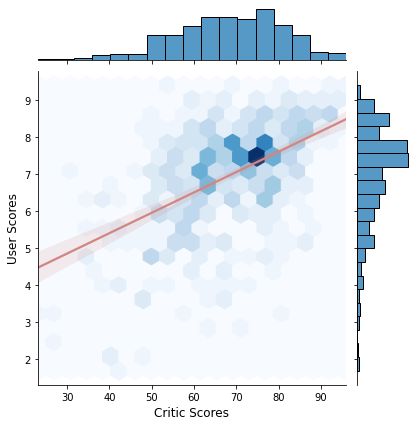

In [160]:
g = sns.jointplot(x = 'Critic_Score',y = 'User_Score',data = dataGames,kind = 'hex',cmap= 'Blues')

sns.regplot(dataGames.Critic_Score, dataGames.User_Score, ax=g.ax_joint, scatter=False, color='#d18683');

plt.xlabel('Critic Scores',fontsize='large')
plt.ylabel('User Scores',fontsize='large');

plt.show()

In [ ]:
g = sns.jointplot(x = 'Critic_Score', 
              y = 'User_Score',
              data = dataGames, 
              kind = 'hex', 
              cmap= 'Blues')

sns.regplot(dataGames.Critic_Score, dataGames.User_Score, ax=g.ax_joint, scatter=False, color='#d18683');

plt.xlabel('Critic Scores',fontsize='large')
plt.ylabel('User Scores',fontsize='large');

plt.show()

In [ ]:
# Las puntuaciones de los usuarios parecen ser más generosas que las de los críticos
# El puntaje crítico es más conservador que el puntaje del usuario
# El puntaje crítico  se correlaciona mucho mejor con las ventas. 

In [ ]:
# https://plotly.com/

import plotly.graph_objects as go
publ_sls=dataGames.groupby(['Year_of_Release','Publisher']).Global_Sales.sum().reset_index()
publ_yr_sls=publ_sls.groupby('Year_of_Release').Global_Sales.max().reset_index()
Pub_of_Yr=pd.merge(publ_yr_sls,publ_sls,on=['Year_of_Release','Global_Sales'],how='left')

go.Figure(data=[
    go.Scatter(
                x=dataGames.groupby(dataGames['Year_of_Release'].sort_values()).sum().drop(['Year_of_Release'],axis=1).reset_index()['Year_of_Release'], 
                y=dataGames.groupby(dataGames['Year_of_Release'].sort_values()).sum().drop(['Year_of_Release'],axis=1).reset_index()['NA_Sales'],
                mode='lines+markers',
                name='North America Sales',
                marker = dict(size=8),
                line=dict(color = '#FA8072',width=2.5),
                text = Pub_of_Yr['Publisher'],
                hovertemplate = '<i>Year: %{x}</i>'
                               '<br><i>Sales: %{y} </i>'),
    go.Scatter(
                x=dataGames.groupby(dataGames['Year_of_Release'].sort_values()).sum().drop(['Year_of_Release'],axis=1).reset_index()['Year_of_Release'], 
                y=dataGames.groupby(dataGames['Year_of_Release'].sort_values()).sum().drop(['Year_of_Release'],axis=1).reset_index()['EU_Sales'],
                mode='lines+markers',
                name='Europe Sales',
                marker = dict(size=8),
                line=dict(color = '#6495ED',width=2.5),
                text = Pub_of_Yr['Publisher'],
                hovertemplate = 'Year: %{x}'
                               '<br><i>Sales: %{y} </i>'),
    go.Scatter(
                x=dataGames.groupby(dataGames['Year_of_Release'].sort_values()).sum().drop(['Year_of_Release'],axis=1).reset_index()['Year_of_Release'], 
                y=dataGames.groupby(dataGames['Year_of_Release'].sort_values()).sum().drop(['Year_of_Release'],axis=1).reset_index()['JP_Sales'],
                mode='lines+markers',
                name='Japan Sales',
                marker = dict(size=8),
                line=dict(color = 'yellowgreen',width=2.5),
                text = Pub_of_Yr['Publisher'],
                hovertemplate = '<i>Year: %{x}</i>'
                               '<br><i>Sales: %{y} </i>'),
    go.Scatter(
                x=dataGames.groupby(dataGames['Year_of_Release'].sort_values()).sum().drop(['Year_of_Release'],axis=1).reset_index()['Year_of_Release'], 
                y=dataGames.groupby(dataGames['Year_of_Release'].sort_values()).sum().drop(['Year_of_Release'],axis=1).reset_index()['Other_Sales'],
                mode='lines+markers',
                name='Other Country Sales',
                marker = dict(size=8),
                line=dict(color = '#DAA520',width=2.5),
                text = Pub_of_Yr['Publisher'],
                hovertemplate = '<i>Year: %{x}</i>'
                               '<br><i>Sales: %{y} </i>')
    
],layout=dict(legend=dict(x=-0.04, y=1.09,font=dict(size=10)),legend_orientation="h",title="Sales of Games in Different Countries over the Years",
            xaxis=dict(tickmode = 'linear',tickangle=-90,tickfont=dict(size=10),title="Year of Release",tickwidth=5,ticklen=8,zeroline=False,gridcolor="white"),
            yaxis=dict(title="Gross Sales in Different Countries",gridcolor="#DCDCDC")
            ,paper_bgcolor='white',plot_bgcolor='white'))

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataGames.corr(),cmap="mako")
# annot = True

In [ ]:
dataGames.corr()['Global_Sales'].sort_values(ascending=False)

## **GRACIAS TOTALES !!**
![BANNER](https://raw.githubusercontent.com/MayumyCH/MayumyCH/main/resources/banner.png)



Redes sociales:


*   [Linkedin](https://www.linkedin.com/in/heydy-mayumy-carrasco-huaccha/)
*   [Github](https://github.com/MayumyCH)
*   [Twitter](https://twitter.com/MayumyCH)
*   [Instagram](https://www.instagram.com/mayumych/)


